In [20]:
# Import useful libraries for analysis
import numpy as np
from matplotlib import pyplot as plt
import pickle
import time

from SignalCalculator import SignalCalculator
from WaveformSimulator import WaveformSimulator

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (9,8)



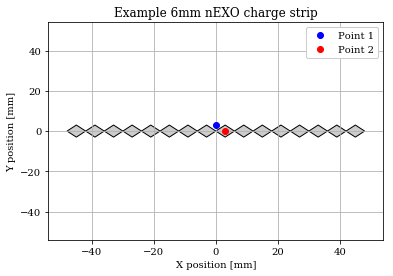

In [2]:
SignalCalculator.DrawStrip()

pt1 = (0., 3., 300.) # (x,y,z) coordinates of ionization event, given in mm
pt2 = (3., 0., 300.) # (x,y,z) coordinates of ionization event, given in mm

plt.plot(pt1[0],pt1[1],'ob',label='Point 1')
plt.plot(pt2[0],pt2[1],'or',label='Point 2')
plt.xlabel('X position [mm]')
plt.ylabel('Y position [mm]')
plt.title('Example 6mm nEXO charge strip')
plt.grid()
plt.legend(framealpha=1.)


/g/g92/hardy27/CurrentAndChargeSignalCalculator/SignalCalculator/SignalCalculator.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  return np.arctan(x*y / (z * np.sqrt(x**2 + y**2 + z**2)))


(0.0, 1.05)

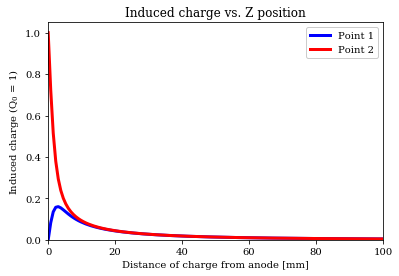

In [3]:
Q = 1. # Assume a unit charge

n_zsteps = 400

pt1_z_steps = np.linspace( 0., pt1[2], n_zsteps)
pt2_z_steps = np.linspace( 0., pt2[2], n_zsteps)

pt1_charge_vs_z = np.zeros(n_zsteps)
pt2_charge_vs_z = np.zeros(n_zsteps)


for i in range(n_zsteps):
    
    pt1_charge_vs_z[i] = SignalCalculator.InducedChargeNEXOStrip( 1., \
                                                                    pt1[0], pt1[1], \
                                                                    pt1_z_steps[i], \
                                                                    padSize=6.)
    pt2_charge_vs_z[i] = SignalCalculator.InducedChargeNEXOStrip( 1., \
                                                                    pt2[0], pt2[1], \
                                                                    pt2_z_steps[i], \
                                                                    padSize=6.)


plt.plot(pt1_z_steps,pt1_charge_vs_z,'-b',linewidth=3,label='Point 1')
plt.plot(pt2_z_steps,pt2_charge_vs_z,'-r',linewidth=3,label='Point 2')

plt.xlabel('Distance of charge from anode [mm]')
plt.ylabel(r'Induced charge (Q$_0$ = 1)')
plt.title('Induced charge vs. Z position')
plt.legend(framealpha=1.)
plt.xlim(0.,100.)
plt.ylim(0.0,1.05)


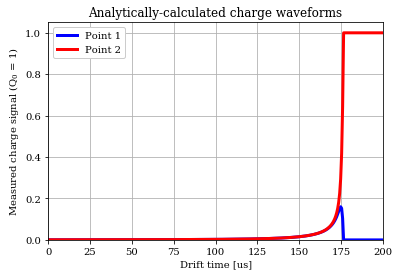

In [4]:
plt.title('Analytically-calculated charge waveforms')

pt1_drift_points, pt1_charge_wfm = SignalCalculator.ComputeChargeWaveformOnStripWithIons( \
                                                    Q, pt1[0], pt1[1], pt1[2], \
                                                    padSize=6., numPads=16 )
pt2_drift_points, pt2_charge_wfm = SignalCalculator.ComputeChargeWaveformOnStripWithIons( \
                                                    Q, pt2[0], pt2[1], pt2[2], \
                                                    padSize=6., numPads=16 )

# Add an extra point on the end to force the charge signal to stay at the 
# amount of collected charge after the collection takes place
pt1_drift_points = np.append( pt1_drift_points, 200.)
pt2_drift_points = np.append( pt2_drift_points, 200.)

pt1_charge_wfm = np.append( pt1_charge_wfm, pt1_charge_wfm[-1])
pt2_charge_wfm = np.append( pt2_charge_wfm, pt2_charge_wfm[-1])


# Plot the waveforms
plt.plot(pt1_drift_points,pt1_charge_wfm,'-b',linewidth=3,label='Point 1')
plt.plot(pt2_drift_points,pt2_charge_wfm,'-r',linewidth=3,label='Point 2')

plt.xlabel('Drift time [us]')
plt.ylabel(r'Measured charge signal (Q$_0$ = 1)')

plt.xlim(0.,200.)
plt.ylim(0.,1.05)

plt.legend(framealpha=1.)
plt.grid()


    

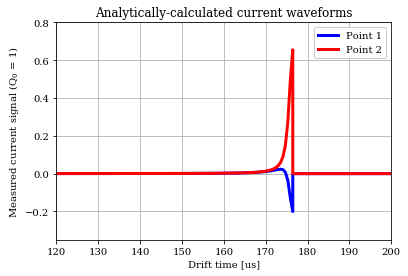

In [5]:
plt.title('Analytically-calculated current waveforms')

pt1_drift_points, pt1_current_wfm = SignalCalculator.ComputeCurrentWaveformOnStrip( \
                                                    Q, pt1[0], pt1[1], pt1[2], \
                                                    padSize=6., numPads=16 )
pt2_drift_points, pt2_current_wfm = SignalCalculator.ComputeCurrentWaveformOnStrip( \
                                                    Q, pt2[0], pt2[1], pt2[2], \
                                                    padSize=6., numPads=16 )

# Add extra points on the end to force the current to go to 0 after
# the charge gets collected.
pt1_drift_points = np.append( pt1_drift_points, pt1_drift_points[-1])
pt2_drift_points = np.append( pt2_drift_points, pt2_drift_points[-1])

pt1_drift_points = np.append( pt1_drift_points, 200.)
pt2_drift_points = np.append( pt2_drift_points, 200.)

pt1_current_wfm = np.append( pt1_current_wfm, [0., 0.])
pt2_current_wfm = np.append( pt2_current_wfm, [0., 0.])


# Plot the waveforms
plt.plot(pt1_drift_points,pt1_current_wfm,'-b',linewidth=3,label='Point 1')
plt.plot(pt2_drift_points,pt2_current_wfm,'-r',linewidth=3,label='Point 2')

plt.xlabel('Drift time [us]')
plt.ylabel(r'Measured current signal (Q$_0$ = 1)')

plt.xlim(120.,200.)
plt.ylim(-0.35,0.8)
plt.legend(framealpha=1.)
plt.grid()


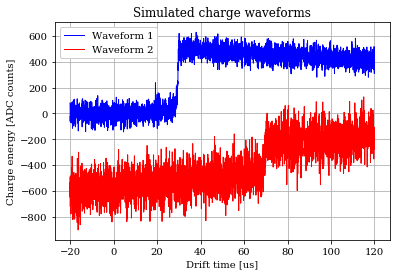

In [18]:
# simulate waveforms for events in the Stanford Long TPC

plt.title('Simulated charge waveforms')

# make a waveform with a charge energy of 500 ADC counts at a drift time of 30 us
# with no offset or baseline drift and inifinite EL
drift_points_1, charge_wfm_1 = WaveformSimulator.MakeWaveform(500,30,inf_EL=True)

# make a waveform with a charge energy of 500 ADC counts at a drift time of 70 us
# with baseline offset, 200 ADC count baseline drift, EL of 50 us, and twice the noise
drift_points_2, charge_wfm_2 = WaveformSimulator.MakeWaveform(500,70,offset_counts=-600,\
                                                              drift_counts=200,noise_sigma=100,\
                                                              electron_lifetime=100.)

# Plot the waveform
plt.plot(drift_points_1,charge_wfm_1,'-b',linewidth=1,label='Waveform 1')
plt.plot(drift_points_2,charge_wfm_2,'-r',linewidth=1,label='Waveform 2')

plt.xlabel('Drift time [us]')
plt.ylabel(r'Charge energy [ADC counts]')
plt.legend(framealpha=1.)
plt.grid()

In [26]:
# since analytically calculating waveforms takes a while, if we want to make
# many simulated waveforms, it's faster to precalculate a few waveforms and
# interpolate from them

charge_grid,drift_grid,charge_energy,drift_time = WaveformSimulator.MakeInterpolationGrids(5,5,charge_min=0.,\
                                                                                           charge_max=1000.,\
                                                                                           drift_min=0.,\
                                                                                           drift_max=80.)

# now that we have the precalculated waveforms, we can pickle these arrays
# to avoid having to repeat the computation next time
with open('waveforms.pkl','wb') as f:
    pickle.dump((charge_grid,drift_grid,charge_energy,drift_time),f)

# to reload the waveforms:
with open('waveforms.pkl','rb') as f:
    charge_grid,drift_grid,charge_energy,drift_time = pickle.load(f)
    
# now we call MakeWaveform with these arrays passed as a tuple to the grids argument
# and the function will interpolate from the precalculated waveforms rather than
# redoing the analytic calculation each time
start = time.time()
for i in range(10):
    drift_points_1, charge_wfm_1 = WaveformSimulator.MakeWaveform(500,30,inf_EL=True)
end = time.time()
print('Time per waveform for analytic calculation: {:.1f} ms'.format((end-start)*100))

start = time.time()
for i in range(10):
    drift_points_1, charge_wfm_1 = WaveformSimulator.MakeWaveform(500,30,inf_EL=True,\
                                                                  grids=(charge_grid,\
                                                                         drift_grid,\
                                                                         charge_energy,\
                                                                         drift_time))
end = time.time()
print('Time per waveform for interpolation: {:.1f} ms'.format((end-start)*100))

Time per waveform for analytic calculation: 1137.3 ms
Time per waveform for interpolation: 15.6 ms
